# Workshop #7: Regression

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

## Problem 1
The file heights_and_weights.csv contains data about a set of males and their heights (in cm) and weights (in kg). You want to set up a model which will predict weight from height.
* Make a scatter plot of the data. Based on the scatter plot alone, is a linear model appropriate for the data? Build the linear model 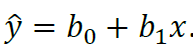.
* Make the residual plot for the data. Based on the value of 𝑅<sup>2</sup> and the residual plot, do you think a linear model is appropriate for the data? It makes sense that weight = 0 would relate to height = 0.
* Build the linear regression model without an intercept: 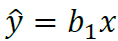. To build this model, instance the model object as LinearRegression(fit_intercept=False). Note: fit_intercept is True by default.
* Determine whether this, second, linear model is appropriate for the data.

In [2]:
# Load the data
df = pd.read_csv('heights_and_weights.csv')
df.head()

,height,weight
0,187.6,109.7
1,174.7,73.6
2,188.2,96.5
3,182.2,99.8
4,177.5,93.6


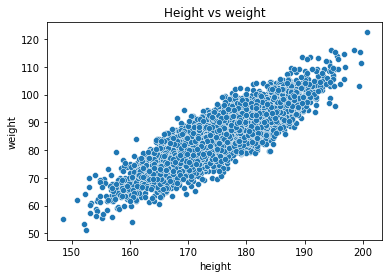

There is a strong linear pattern in the data


In [3]:
plt.figure()
sns.scatterplot(x='height', y='weight', data=df)
plt.title('Height vs weight')
plt.show()

print('There is a strong linear pattern in the data')

In [4]:
# Build the model
X = np.array(df['height']).reshape(-1, 1)
y = df['weight']

model1 = LinearRegression()
model1.fit(X, y)

print('b_0 = ', model1.intercept_)
print('b_1 = ', model1.coef_)
print(f'The model is y-hat = {model1.intercept_} + {model1.coef_[0]}x')

b_0 =  -101.81760837467515
b_1 =  [1.06457237]
The model is y-hat = -101.81760837467515 + 1.064572374055281x


Correlation coefficient: r =  0.8629625685399694
Determination coefficient: r^2 =  0.7447043947011015


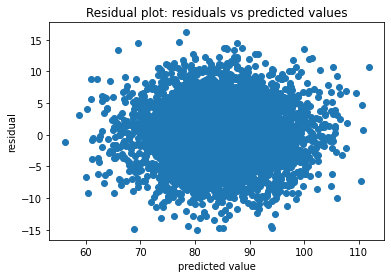

The residual plot shows a blob, so the model is appropriate!


In [5]:
# Calculate the residuals
pred = model1.predict(X)
resid = y - pred

# Calculate r and r^2
r_sq = model1.score(X, y)
r = np.sqrt(r_sq)
print('Correlation coefficient: r = ', r)
print('Determination coefficient: r^2 = ', r_sq)

# Make a residual plot
plt.figure()
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted values')
plt.show()

print('The residual plot shows a blob, so the model is appropriate!')

In [6]:
# Build the model without intercept
model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

print('b_1 = ', model2.coef_)
print(f'The model is y-hat = {model2.coef_[0]}x')

b_1 =  [0.48484046]
The model is y-hat = 0.484840460148295x


Correlation coefficient: r =  0.7235186427445492
Determination coefficient: r^2 =  0.5234792263989148


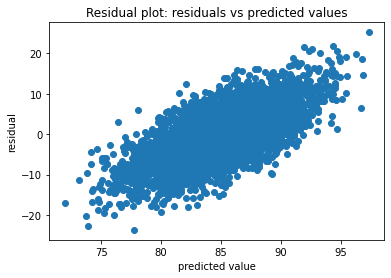

The residual plot shows a pattern, so the model is not appropriate!


In [7]:
# Calculate the residuals
pred = model2.predict(X)
resid = y - pred

# Calculate r and r^2
r_sq = model2.score(X, y)
r = np.sqrt(r_sq)
print('Correlation coefficient: r = ', r)
print('Determination coefficient: r^2 = ', r_sq)

# Make a residual plot
plt.figure()
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted values')
plt.show()

print('The residual plot shows a pattern, so the model is not appropriate!')

## Problem 2
The file named mutual_funds.csv contains information about 45 mutual funds that are part of the Morningstar Funds 500 for 2008. The data set includes the following five variables:
* **Fund Type:** The type of fund, labeled DE (Domestic Equity), IE (International Equity), and FI (Fixed Income).
* **Net Asset Value (USD):** The closing price per share on December 31, 2007.
* **Expense Ratio (%):** The percentage of assets deducted each fiscal year for fund expenses.
* **Morningstar Rank:** The risk adjusted star rating for each fund, from a low of 1-Star to a high of 5-Stars.
* **5-Year Average Return (%):** The average annual return for the fund over the past five years.

The goal of this exercise is to build models to predict the 5-year average return for a domestic equity fund with a Net Asset Value of $35.53 and an expense ratio of 1.05% and a 3-Star Morningstar Rank.
* Using only the two numerical variables build a multivariable linear model for predicting the 5-Year Average Return. Establish if the model is appropriate for the data by considering the residual plot and calculating 𝑅𝑅2.
* Predict the 5-Year Average Return for the fund we are interesed in (underlined above; use only the variables you need for the model)
* Next, we want to include the categorical variables (Fund Type and Morningstar Rank) in a new multilinear model. To achieve this, we must code them. Using OrdinalEncoder(), encode the mornigstar_rank and fund_type, and then build the linear model. Once you have built the model, establish if it is appropriate by considering the residual plot and 𝑅𝑅2
* Predict the 5-Year Average Return for the fund we are interested in (underlined above; use all variables, be careful with the encoding).
* Finally, compare the two models using MAE, MSE and RMSE and decide which one performs better (use the original data to make the assessment, no need to split it into train and test).

In [8]:
# Load the data
df = pd.read_csv('mutual_funds.csv')
df.head()

,fund_name,fund_type,net_asset_value,expense_ratio,morningstar_rank,five_year_avg_return
0,Amer Cent Inc & Growth Inv,DE,28.88,0.67,2-Star,12.39
1,American Century Intl. Disc,IE,14.37,1.41,3-Star,30.53
2,American Century Tax-Free Bond,FI,10.73,0.49,4-Star,3.34
3,American Century Ultra,DE,24.94,0.99,3-Star,10.88
4,Ariel,DE,46.39,1.03,2-Star,11.32


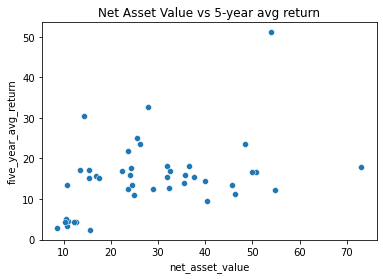

In [9]:
plt.figure()
sns.scatterplot(x='net_asset_value', y='five_year_avg_return', data=df)
plt.title('Net Asset Value vs 5-year avg return')
plt.show()

In [10]:
# Build the model
X = df[['net_asset_value', 'expense_ratio']]
y = df['five_year_avg_return']

model = LinearRegression()
model.fit(X, y)

intercept = np.round(model.intercept_, 3)
coef = np.round(model.coef_, 3)
print('The intercept is: ', intercept)
print('The coefficients are: ', coef)
print(f'The model is:\nfive_year_avg_return = {intercept} + {coef[0]}*{X.columns[0]} + {coef[1]}*{X.columns[1]}')

The intercept is:  0.214
The coefficients are:  [ 0.153 11.669]
The model is:
five_year_avg_return = 0.214 + 0.153*net_asset_value + 11.669*expense_ratio


r-sq =  0.37310517954477973
pred =  [17.90954368]


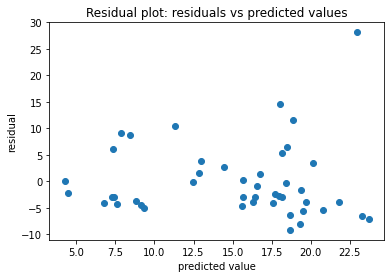

One point stands out and it's far away from the rest of them.


In [11]:
# Evaluating the model
r_sq = model.score(X, y)

x2 = [[35.53, 1.05]]
y2 = model.predict(x2)

# Residuals and stuff
pred = model.predict(X)
resid = y - pred

pred_1 = model.predict(X)
resid_1 = y - pred_1

print('r-sq = ', r_sq)
print('pred = ', y2)

# Make a residual plot
plt.figure()
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted values')
plt.show()

print("One point stands out and it's far away from the rest of them.")

In [12]:
encoder = OrdinalEncoder()
df['mr_enc'] = encoder.fit_transform(np.array(df['morningstar_rank']).reshape(-1, 1))
df['ft_enc'] = encoder.fit_transform(np.array(df['fund_type']).reshape(-1, 1))
df.head()

,fund_name,fund_type,net_asset_value,expense_ratio,morningstar_rank,five_year_avg_return,mr_enc,ft_enc
0,Amer Cent Inc & Growth Inv,DE,28.88,0.67,2-Star,12.39,0.0,0.0
1,American Century Intl. Disc,IE,14.37,1.41,3-Star,30.53,1.0,2.0
2,American Century Tax-Free Bond,FI,10.73,0.49,4-Star,3.34,2.0,1.0
3,American Century Ultra,DE,24.94,0.99,3-Star,10.88,1.0,0.0
4,Ariel,DE,46.39,1.03,2-Star,11.32,0.0,0.0


In [13]:
# Build the model
X1 = df[['net_asset_value', 'expense_ratio', 'mr_enc', 'ft_enc']]
y1 = df['five_year_avg_return']

model = LinearRegression()
model.fit(X1, y1)

intercept = np.round(model.intercept_, 3)
coef = np.round(model.coef_, 3)
print('The intercept is: ', intercept)
print('The coefficients are: ', coef)
print(f'The model is:\nfive_year_avg_return = {intercept} + {coef[0]}*{X.columns[0]} + {coef[1]}*{X.columns[1]} + {coef[2]}*mr_enc + {coef[3]}*ft_enc')

The intercept is:  -4.829
The coefficients are:  [ 0.174 12.437  0.849  4.177]
The model is:
five_year_avg_return = -4.829 + 0.174*net_asset_value + 12.437*expense_ratio + 0.849*mr_enc + 4.177*ft_enc


r-sq =  0.5121278918325249
pred =  [15.25479561]


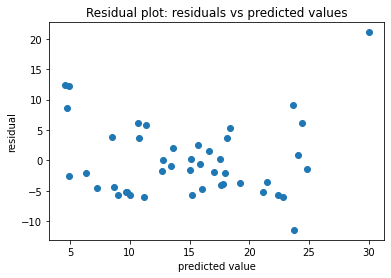

There's that one point again. We do not like that point.


In [14]:
# Evaluating the model
r_sq = model.score(X1, y1)

#x2 = [[35.53, 1.05]]
#y2 = model.predict(x2)



X3 = [[35.53, 1.05, 1.0, 0.0]]
y3 = model.predict(X3)

# Residuals and stuff
pred_3 = model.predict(X1)
resid_3 = y1 - pred_3

pred_2 = model.predict(X1)
resid_2 = y1 - pred_2

print('r-sq = ', r_sq)
print('pred = ', y3)

# Make a residual plot
plt.figure()
plt.scatter(pred_3, resid_3)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted values')
plt.show()

print("There's that one point again. We do not like that point.")

In [15]:
mae1 = mean_absolute_error(y, pred_1)
mse1 = mean_squared_error(y, pred_1)
rmse1 = np.sqrt(mse1)
print('Model with two features:')
print('MAE = ', mae1)
print('MSE = ', mse1)
print('RMSE = ', rmse1)
print('\n')

mae2 = mean_absolute_error(y1, pred_2)
mse2 = mean_squared_error(y1, pred_2)
rmse2 = np.sqrt(mse2)
print('Model with all features:')
print('MAE = ', mae2)
print('MSE = ', mse2)
print('RMSE = ', rmse2)
print('\n')

print('Second model is more appropriate as it offers smaller mean absolute and meand squared error.')

Model with two features:
MAE =  5.07745503127636
MSE =  47.54545799349688
RMSE =  6.895321456864566


Model with all features:
MAE =  4.692991934847559
MSE =  37.001586339844984
RMSE =  6.082892925232613


Second model is more appropriate as it offers smaller mean absolute and meand squared error.


## Problem 3
The file weights_and_mpg.csv contains some data about cars. The goal is to build a model that can be used to predict the mileage of a car (i.e. the fuel efficiency) based on the car's weight.
* Build a linear model of the mileage using weight as input. Give reasons why the linear model is not appropriate for these data.
* Build a quadratic model for the mileage using weight as input by transforming the data using appropriate polynomial transformation. Provide evidence that this model is (more) appropriate for the data than the linear model.

In [16]:
# Load the data
df = pd.read_csv('weights_and_mpg.csv')
df.head()

,weight,mpg
0,4.360,16.9
1,4.054,15.5
2,3.605,19.2
3,3.940,18.5
4,2.155,30.0


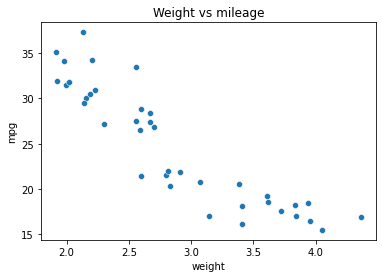

In [17]:
# Make a scatter plot
plt.figure()
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('Weight vs mileage')
plt.show()

In [18]:
# Constructing the linear model
X = np.array(df['weight']).reshape(-1, 1)
y = np.array(df['mpg']).reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

coef = np.round(model.coef_[0], 2)
intercept = np.round(model.intercept_, 2)
print(f'The model is: y-hat = {intercept} + {coef}x')

The model is: y-hat = [48.71] + [-8.36]x


r-sq =  0.8155369188106256
r =  0.9030708271285401
The residual plot shows a pattern, so the model is not appropriate!


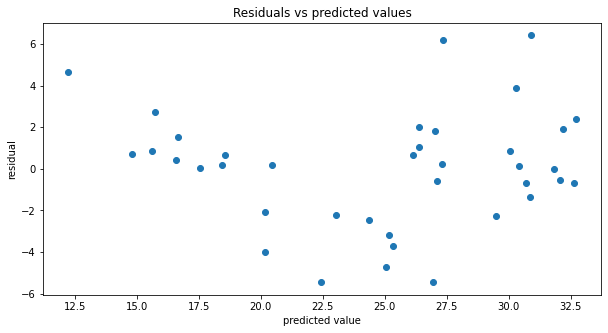

In [19]:
# Establishing if the model is good
# Use r^2 and residuals
r_sq = model.score(X, y)
print('r-sq = ', r_sq)
print('r = ', np.sqrt(r_sq))

pred = model.predict(X)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(10, 5))
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

print('The residual plot shows a pattern, so the model is not appropriate!')

r-sq =  0.8597310866068942
r =  0.9272168498290431


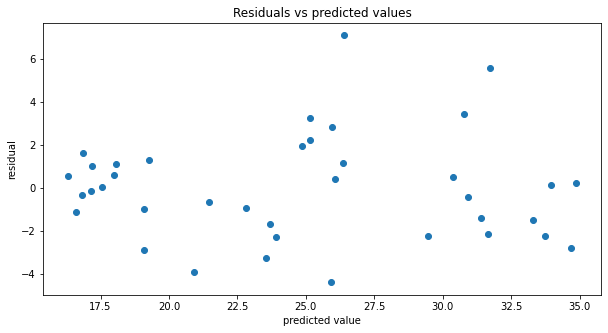

In [20]:
# Fittina a nonlinear model - quadratic model

# Instance the transformer, transform the data
poly_transformer = PolynomialFeatures(degree=2)
poly_transformer.fit(X)
X_trans = poly_transformer.transform(X)

# Build the model
quad_model = LinearRegression().fit(X_trans, y)
y_trans_pred = quad_model.predict(X_trans)
resid_trans = y - y_trans_pred

r_sq = quad_model.score(X_trans, y)
print('r-sq = ', r_sq)
print('r = ', np.sqrt(r_sq))

plt.figure(figsize=(10, 5))
plt.scatter(y_trans_pred, resid_trans)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')
plt.show()

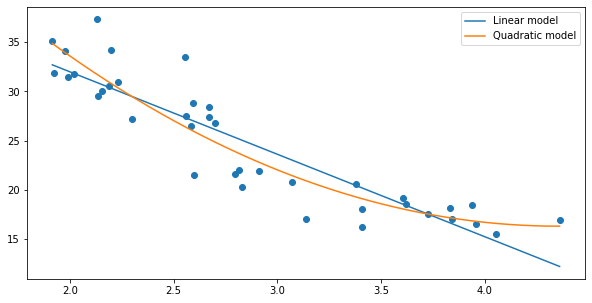

In [21]:
# Plot the two models
xs = np.linspace(X.min(), X.max(), 1000)
y_lin = model.predict(xs.reshape(-1, 1))
y_quad = quad_model.predict(poly_transformer.transform(xs.reshape(-1, 1)))

plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(xs, y_lin, label='Linear model')
plt.plot(xs, y_quad, label='Quadratic model')
plt.legend()
plt.show()

In [22]:
mae1 = mean_absolute_error(y, pred)
mse1 = mean_squared_error(y, pred)
rmse1 = np.sqrt(mse1)
print('Linear model:')
print('MAE = ', mae1)
print('MSE = ', mse1)
print('RMSE = ', rmse1)
print('\n')

mae2 = mean_absolute_error(y, y_trans_pred)
mse2 = mean_squared_error(y, y_trans_pred)
rmse2 = np.sqrt(mse2)
print('Quadratic model:')
print('MAE = ', mae2)
print('MSE = ', mse2)
print('RMSE = ', rmse2)
print('\n')

print('Quadratic model is more appropriate as it offers smaller mean absolute and mean squared error.')

Linear model:
MAE =  2.076521879755083
MSE =  7.699347212431659
RMSE =  2.774769758454142


Quadratic model:
MAE =  1.8572382863656272
MSE =  5.854716620586498
RMSE =  2.419652169338911


Quadratic model is more appropriate as it offers smaller mean absolute and mean squared error.


## Problem 4
The file gender_classification.csv contains data about the gender, weights and heights of 10000 people. The goal of this task is to build a logistic regression model to predict the gender of a person based on their height and weight
* Split the given data set into a train and test set. To ensure everyone gets the same results, use random_state=1234
* Build the logistic model using the train data
* In the next step, evaluate the model’s performance on the test data. Construct the confusion matrix, and calculate the model’s mean accuracy score
* Finally, make a prediction about the gender of the median person and the mean person, i.e. the persons who have median/mean height and median/mean weight.

In [23]:
# Load the data
df = pd.read_csv('gender_classification.csv')
df.head()

,height,weight,gender
0,162.6,66.6,Female
1,164.7,71.9,Female
2,153.0,43.5,Female
3,182.9,95.7,Male
4,163.1,56.6,Female


In [24]:
df['target'] = encoder.fit_transform(np.array(df['gender']).reshape(-1, 1))
df.head()

,height,weight,gender,target
0,162.6,66.6,Female,0.0
1,164.7,71.9,Female,0.0
2,153.0,43.5,Female,0.0
3,182.9,95.7,Male,1.0
4,163.1,56.6,Female,0.0


In [25]:
# Build the model
X = df[['height', 'weight']]
y = df['target']

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

Evaluating the model on the TRAIN data:
Accuracy:  0.9201428571428572
Evaluating the model on the TEST data:
Accuracy:  0.9163333333333333


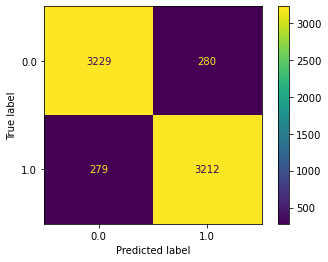

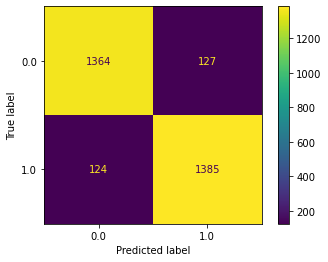

In [27]:
# Building the model based on height and weight
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions, and evaluate the model
print('Evaluating the model on the TRAIN data:')
plot_confusion_matrix(model, X_train, y_train)
print('Accuracy: ', model.score(X_train, y_train))

print('Evaluating the model on the TEST data:')
plot_confusion_matrix(model, X_test, y_test)
print('Accuracy: ', model.score(X_test, y_test))

In [28]:
mean_h = df['height'].mean()
mean_w = df['weight'].mean()
mean_h, mean_w

(168.5739400000003, 73.22825999999979)

In [29]:
median_h = df['height'].median()
median_w = df['weight'].median()
median_h, median_w

(168.4, 73.1)

In [30]:
pred_mean = model.predict([[mean_h, mean_w]]) # female
pred_median = model.predict([[median_h, median_w]]) # female
pred_mean, pred_median

(array([0.]), array([0.]))